# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 3385 Комаренко Тимофей. Вариант №9.


## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей

## Основные теоретические положения

### Меры центральности (Centrality Measures)

#### 1. Центральность по степени (Degree Centrality)

**Исходная формула:**
$$ C_D(n_i) = \sum_{j=1}^{g} x_{ij} $$

**Нормализованная версия:**
$$ C_D'(n_i) = \frac{C_D(n_i)}{g-1} $$

где:
- $x_{ij}$ — элемент социоматрицы (1 если есть связь, 0 если нет)
- $g$ — общее количество вершин в сети

#### 2. Центральность по близости (Closeness Centrality)

**Исходная формула:**
$$ C_C(n_i) = \frac{1}{\sum_{j=1}^{g} d(n_i, n_j)} $$

**Нормализованная версия:**
$$ C_C'(n_i) = \frac{g-1}{\sum_{j=1}^{g} d(n_i, n_j)} $$

где:
- $d(n_i, n_j)$ — длина кратчайшего пути между вершинами $n_i$ и $n_j$

### Меры престижа (Prestige Measures)

#### 1. Престиж по степени (Degree Prestige)

**Исходная формула:**
$$ P_D(n_i) = \sum_{j=1}^{g} x_{ji} $$

**Нормализованная версия:**
$$ P_D'(n_i) = \frac{P_D(n_i)}{g-1} $$

где:
- $x_{ji}$ — входящая связь от $n_j$ к $n_i$

#### 2. Ранговый престиж (Rank Prestige)

**Матричная формула:**
$$ \mathbf{p} = \mathbf{X}^T \mathbf{p} $$

**Решение через собственные векторы:**
$$ \mathbf{p} = \text{eigenvector}(\mathbf{X}^T) $$

где:
- $\mathbf{p}$ — вектор престижа
- $\mathbf{X}$ — стандартизированная социоматрица (суммы столбцов = 1)

### Дополнительные метрики сети

#### Плотность сети (Density)
$$ \Delta = \frac{2L}{g(g-1)} $$
где $L$ — количество рёбер

#### Коэффициент кластеризации (Clustering Coefficient)
$$ C = \frac{3 \times \text{количество треугольников}}{\text{количество связанных троек}} $$

#### Диаметр сети (Diameter)
$$ D = \max  d(n_i, n_j) $$

## Выполнение работы

### Подключение библеотек

In [ ]:
install.packages("igraph", repos = "://cloud.r-project.org/")
library(igraph)https

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("igraph", repos = "https://cloud.r-project.org/"):
“installation of package ‘igraph’ had non-zero exit status”


### извлечение социоматрицы с помощью соответствующих функций. Вывод полученной социоматрицы на экран.

In [ ]:
florentine_business <- read.csv("/content/florentine_business.csv", skip=1)

m <- as.matrix(florentine_business)

g <- igraph::graph_from_adjacency_matrix(m)

sociomartix <- igraph::as_adjacency_matrix(g)

sociomartix

  [[ suppressing 16 column names ‘Acciaiuoli’, ‘Albizzi’, ‘Barbadori’ ... ]]



16 x 16 sparse Matrix of class "dgCMatrix"
                                            
Acciaiuoli   . . . . . . . . . . . . . . . .
Albizzi      . . . . . . . . . . . . . . . .
Barbadori    . . . . 1 1 . . 1 . 1 . . . . .
Bischeri     . . . . . . 1 1 . . 1 . . . . .
Castellani   . . 1 . . . . 1 . . 1 . . . . .
Ginori       . . 1 . . . . . 1 . . . . . . .
Guadagni     . . . 1 . . . 1 . . . . . . . .
Lamberteschi . . . 1 1 . 1 . . . 1 . . . . .
Medici       . . 1 . . 1 . . . 1 . . . 1 . 1
Pazzi        . . . . . . . . 1 . . . . . . .
Peruzzi      . . 1 1 1 . . 1 . . . . . . . .
Pucci        . . . . . . . . . . . . . . . .
Ridolfi      . . . . . . . . . . . . . . . .
Salviati     . . . . . . . . 1 . . . . . . .
Strozzi      . . . . . . . . . . . . . . . .
Tornabuoni   . . . . . . . . 1 . . . . . . .

### Преобразование социоматрицы в список рёбер. Вывод первых 5 элементов списка рёбер.

In [ ]:
edge_list <- as_edgelist(g)

head(edge_list, 5)

Barbadori,Castellani
Barbadori,Ginori
Barbadori,Medici
Barbadori,Peruzzi
Bischeri,Guadagni


### Присвоение имен столбцам и строкам социоматрицы (имена — первая строка в csv-файле после комментариев).

In [ ]:
# Получаем имена из florentine_business
v_names <- c("Acciaiuoli", "Albizzi", "Barbadori", "Bischeri", "Castellani", "Ginori", "Guadagni", "Lamberteschi", "Medici",  "Pazzi", "Peruzzi", "Pucci", "Ridolfi", "Salviati", "Strozzi", "Tornabuoni")

# Присваиваем имена социоматрице
dimnames(sociomartix) <- list(v_names, v_names)

print(sociomartix)

16 x 16 sparse Matrix of class "dgCMatrix"


  [[ suppressing 16 column names ‘Acciaiuoli’, ‘Albizzi’, ‘Barbadori’ ... ]]



                                            
Acciaiuoli   . . . . . . . . . . . . . . . .
Albizzi      . . . . . . . . . . . . . . . .
Barbadori    . . . . 1 1 . . 1 . 1 . . . . .
Bischeri     . . . . . . 1 1 . . 1 . . . . .
Castellani   . . 1 . . . . 1 . . 1 . . . . .
Ginori       . . 1 . . . . . 1 . . . . . . .
Guadagni     . . . 1 . . . 1 . . . . . . . .
Lamberteschi . . . 1 1 . 1 . . . 1 . . . . .
Medici       . . 1 . . 1 . . . 1 . . . 1 . 1
Pazzi        . . . . . . . . 1 . . . . . . .
Peruzzi      . . 1 1 1 . . 1 . . . . . . . .
Pucci        . . . . . . . . . . . . . . . .
Ridolfi      . . . . . . . . . . . . . . . .
Salviati     . . . . . . . . 1 . . . . . . .
Strozzi      . . . . . . . . . . . . . . . .
Tornabuoni   . . . . . . . . 1 . . . . . . .


### Построение ненаправленной сети.

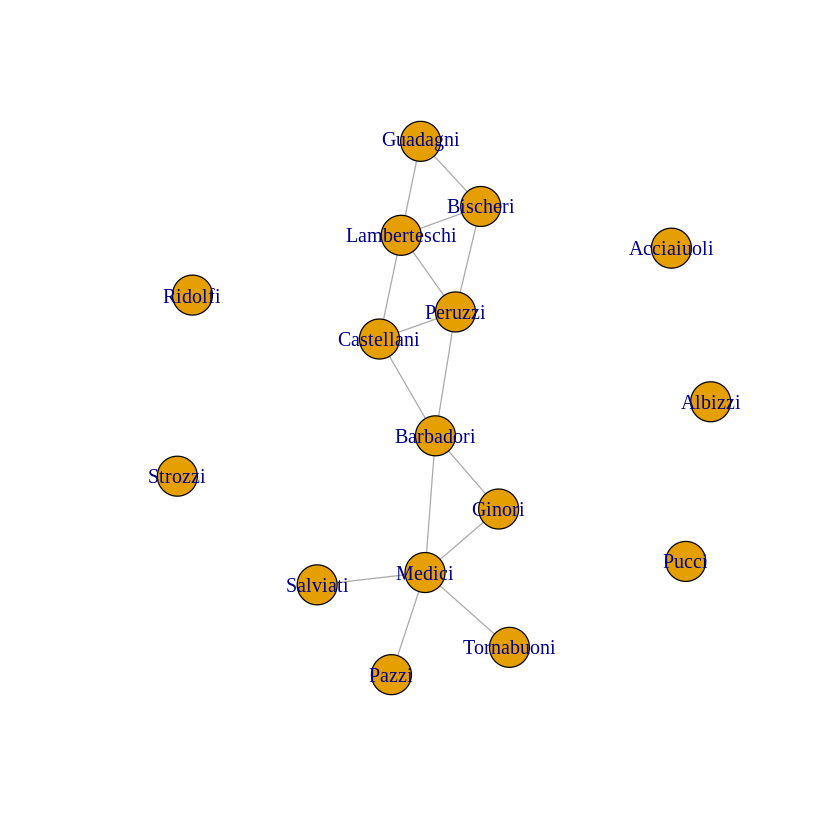

In [61]:
net <- graph_from_adjacency_matrix(
  sociomartix,           # социоматрица
  mode = "undirected",   # тип сети: ненаправленная
  weighted = NULL,       # веса рёбер: NULL - без весов
  diag = FALSE,          # включать ли петли: FALSE - исключить
  add.colnames = NULL,   # имена вершин: NULL - использовать имена матрицы
  add.rownames = NA      # имена строк: NA - не добавлять отдельно
)

plot(net)

### Отображение сети с помощью различных алгоритмов укладки графа

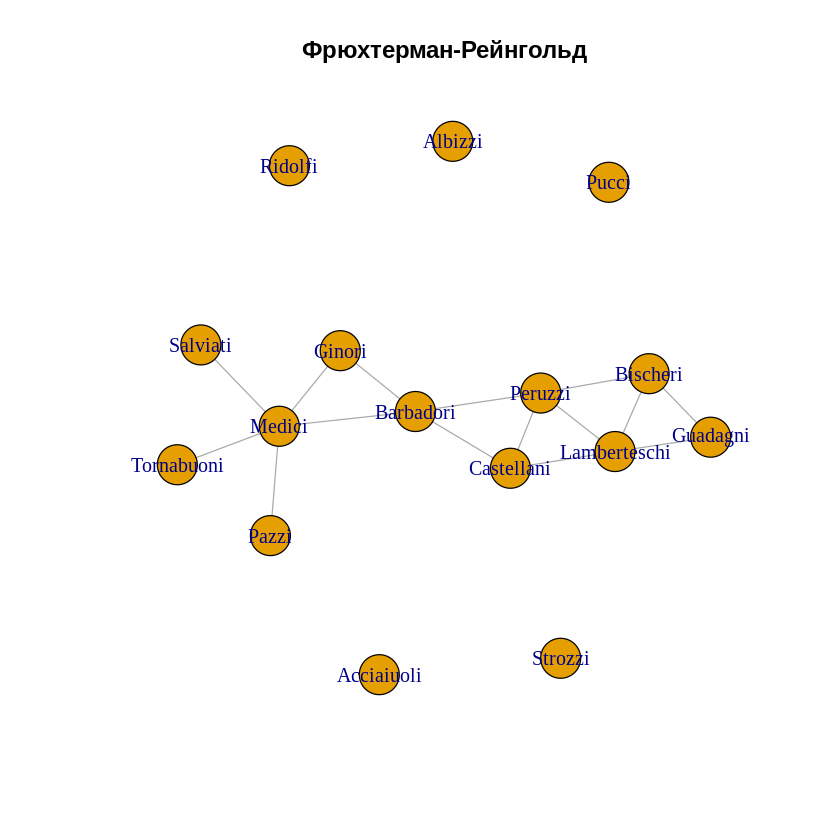

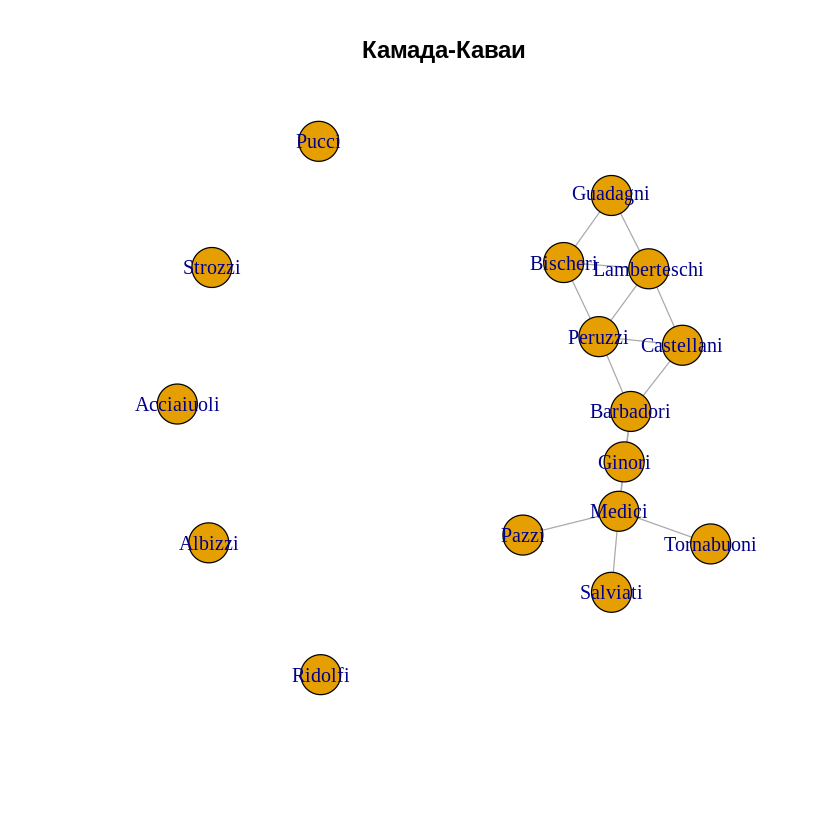

In [62]:
# Алгоритм Фрюхтермана-Рейнгольда (main-заголовок, layout-укладка)
plot(net, main = "Фрюхтерман-Рейнгольд", layout = layout_with_fr)

# Алгоритм Камада-Каваи
plot(net, main = "Камада-Каваи", layout = layout_with_kk)

#### Объяснение различий между алгоритмами:
Алгоритм Фрюхтермана—Рейнгольда
Принцип работы:

Моделирует вершины как заряженные частицы, которые отталкиваются друг от друга

Рёбра действуют как пружины, притягивающие связанные вершины

Итерационный процесс поиска равновесия между силами отталкивания и притяжения


Лучше для: Сетей с выраженными сообществами и кластерами

Алгоритм Камады—Каваи
Принцип работы:

Минимизирует "энергию" системы на основе идеальных расстояний между вершинами

Идеальное расстояние между вершинами пропорционально длине кратчайшего пути

Стремится расположить вершины так, чтобы графическое расстояние соответствовало структурному

### Вывод «описательной сводки» сети.

In [ ]:
install.packages("intergraph")
  library(intergraph)

install.packages("statnet")
  library(statnet)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’, ‘network’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘rbibutils’, ‘robustbase’, ‘ergm.multi’, ‘Rdpack’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘networkLite’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘networkDynamic’


Loading required package: tergm

Loading required package: ergm

Loading required package: network


‘network’ 1.19.0 (2024-12-08), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bip

In [63]:
stat_net <- asNetwork(net)
summary(stat_net)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 15 
   missing edges = 0 
   non-missing edges = 15 
 density = 0.125 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    3    5
 [2,]    3    6
 [3,]    3    9
 [4,]    3   11
 [5,]    4    7
 [6,]    4    8
 [7,]    4   11
 [8,]    5    8
 [9,]    5   11
[10,]    6    9
[11,]    7    8
[12,]    8   11
[13,]    9   10
[14,]    9   14
[15,]    9   16

### Вычислить пятичесловую сводку

In [66]:
# Размер сети
cat("Количество вершин:", network.size(stat_net), "\n")

# Плотность сети
# Вручную: так как граф не направленный достаточно поделить количество ребер на количество пар из вершин
size <- network.size(stat_net)
cat("Плотность:", network.edgecount(stat_net) / (size*(size-1)), "\n")

# Число компонент
cat("Число компонент связности:", components(stat_net), "\n")

# Диаметр сети
diam <- diameter(net)
cat("Диаметр:",diam, "\n")

# Коэффициент кластеризации
cat("Коэффициент кластеризации:", round(gtrans(stat_net, mode = "graph"), 3), "\n")#рассчет глобального коэффициента кластеризации для ненаправленного графа


Количество вершин: 16 
Плотность: 0.0625 
Число компонент связности: 6 
Диаметр: 5 
Коэффициент кластеризации: 0.417 


### Заполнение таблицы для различных мер центральности.

In [73]:
# Удаление изолированных вершин
iso <- which(degree(stat_net, gmode = "graph") == 0)
net_without_iso <- stat_net
delete.vertices(net_without_iso, iso)

size <- network.size(net_without_iso)


# Расчет мер центральности
family_names <- net_without_iso %v% 'vertex.names'
degree_vals <- round(degree(net_without_iso, gmode = "graph") / (size-1), 2)
closeness_vals <- round(closeness(net_without_iso, gmode = "graph"), 2)
betweenness_vals <- round(betweenness(net_without_iso, gmode = "graph") / ((size-1)*(size-2)/2), 2)
info_vals <- round(infocent(net_without_iso, gmode = "graph") / sum(infocent(net_without_iso, gmode = "graph")), 2)


# Создание таблицы
centrality_table <- data.frame(
  Семья = family_names,
  Степень = degree_vals,
  Близость = closeness_vals,
  Посредничество = betweenness_vals,
  Информация = info_vals
)


print(centrality_table)

          Семья Степень Близость Посредничество Информация
1     Barbadori     0.4     0.59           0.56       0.12
2      Bischeri     0.3     0.40           0.06       0.09
3    Castellani     0.3     0.50           0.11       0.10
4        Ginori     0.2     0.45           0.00       0.10
5      Guadagni     0.2     0.31           0.00       0.08
6  Lamberteschi     0.4     0.42           0.13       0.10
7        Medici     0.5     0.53           0.53       0.11
8         Pazzi     0.1     0.36           0.00       0.06
9       Peruzzi     0.4     0.53           0.30       0.11
10     Salviati     0.1     0.36           0.00       0.06
11   Tornabuoni     0.1     0.36           0.00       0.06


Семья Медичи - абсолютный лидер сети:

Наибольшая степень центральности (0.5) - больше всего прямых связей

Высокие показатели посредничества (0.53) - контролирует информационные потоки

Высокая близостная центральность (0.53) - быстрый доступ ко всей сети

Второстепенные ключевые игроки:

Barbadori и Peruzzi - также имеют высокие показатели по всем мерам

Lamberteschi - много связей, но менее центральное положение

2. Структурные позиции в сети
Посредники:

Medici (0.53), Barbadori (0.56), Peruzzi (0.30)

Контролируют потоки информации между разными группами

Периферийные акторы:

Pazzi, Salviati, Tornabuoni (все показатели низкие)

Имеют минимальное влияние на сетевые процессы

### пункты 2-7 направленной сети

In [75]:
krackhardt <- read.csv("/content/krackhardt_advice.csv", , header=FALSE, skip=2)

m2 <- as.matrix(krackhardt)

g2 <- igraph::graph_from_adjacency_matrix(m2)

sociomartix2 <- igraph::as_adjacency_matrix(g2)

sociomartix2

  [[ suppressing 21 column names ‘V1’, ‘V2’, ‘V3’ ... ]]



21 x 21 sparse Matrix of class "dgCMatrix"
                                             
V1  . 1 . 1 . . . 1 . . . . . . . 1 . 1 . . 1
V2  . . . . . 1 1 . . . . . . . . . . . . . 1
V3  1 1 . 1 . 1 1 1 1 1 1 1 . 1 . . 1 1 . 1 1
V4  1 1 . . . 1 . 1 . 1 1 1 . . . 1 1 1 . 1 1
V5  1 1 . . . 1 1 1 . 1 1 . 1 1 . 1 1 1 1 1 1
V6  . . . . . . . . . . . . . . . . . . . . 1
V7  . 1 . . . 1 . . . . 1 1 . 1 . . 1 1 . . 1
V8  . 1 . 1 . 1 1 . . 1 1 . . . . . . 1 . . 1
V9  1 1 . . . 1 1 1 . 1 1 1 . 1 . 1 1 1 . . 1
V10 1 1 1 1 1 . . 1 . . 1 . 1 . 1 1 1 1 1 1 .
V11 1 1 . . . . 1 . . . . . . . . . . . . . .
V12 . . . . . . 1 . . . . . . . . . . . . . 1
V13 1 1 . . 1 . . . 1 . . . . 1 . . . 1 . . .
V14 . 1 . . . . 1 . . . . . . . . . . 1 . . 1
V15 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . 1 1 1 1 1 1
V16 1 1 . . . . . . . 1 . . . . . . . 1 . . .
V17 1 1 . 1 . . 1 . . . . . . . . . . . . . 1
V18 1 1 1 1 1 . 1 1 1 1 1 . 1 1 1 1 . . 1 1 1
V19 1 1 1 . 1 . 1 . . 1 1 . . 1 1 . . 1 . 1 .
V20 1 1 . . . 1 . 1 . . 1 1 . 1 1 1 1

#### Список ребер


In [76]:
edge_list2 <- as_edgelist(g2)

head(edge_list2, 5)

V1,V2
V1,V4
V1,V8
V1,V16
V1,V18


#### Присвоение имен

In [77]:
# Получаем имена из florentine_business
v_names2 <- c(
  "Alice", "Bob", "Carol", "David", "Eve", "Frank", "Grace",
  "Hank", "Ivy", "Jack", "Kathy", "Leo", "Mona", "Nina",
  "Oscar", "Paul", "Quinn", "Rita", "Steve", "Tracy", "Uma"
)

# Присваиваем имена социоматрице
dimnames(sociomartix2) <- list(v_names2, v_names2)

print(sociomartix2)

21 x 21 sparse Matrix of class "dgCMatrix"


  [[ suppressing 21 column names ‘Alice’, ‘Bob’, ‘Carol’ ... ]]



                                               
Alice . 1 . 1 . . . 1 . . . . . . . 1 . 1 . . 1
Bob   . . . . . 1 1 . . . . . . . . . . . . . 1
Carol 1 1 . 1 . 1 1 1 1 1 1 1 . 1 . . 1 1 . 1 1
David 1 1 . . . 1 . 1 . 1 1 1 . . . 1 1 1 . 1 1
Eve   1 1 . . . 1 1 1 . 1 1 . 1 1 . 1 1 1 1 1 1
Frank . . . . . . . . . . . . . . . . . . . . 1
Grace . 1 . . . 1 . . . . 1 1 . 1 . . 1 1 . . 1
Hank  . 1 . 1 . 1 1 . . 1 1 . . . . . . 1 . . 1
Ivy   1 1 . . . 1 1 1 . 1 1 1 . 1 . 1 1 1 . . 1
Jack  1 1 1 1 1 . . 1 . . 1 . 1 . 1 1 1 1 1 1 .
Kathy 1 1 . . . . 1 . . . . . . . . . . . . . .
Leo   . . . . . . 1 . . . . . . . . . . . . . 1
Mona  1 1 . . 1 . . . 1 . . . . 1 . . . 1 . . .
Nina  . 1 . . . . 1 . . . . . . . . . . 1 . . 1
Oscar 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . 1 1 1 1 1 1
Paul  1 1 . . . . . . . 1 . . . . . . . 1 . . .
Quinn 1 1 . 1 . . 1 . . . . . . . . . . . . . 1
Rita  1 1 1 1 1 . 1 1 1 1 1 . 1 1 1 1 . . 1 1 1
Steve 1 1 1 . 1 . 1 . . 1 1 . . 1 1 . . 1 . 1 .
Tracy 1 1 . . . 1 . 1 . . 1 1 . 1 1 1 1 

#### построить направленную сеть

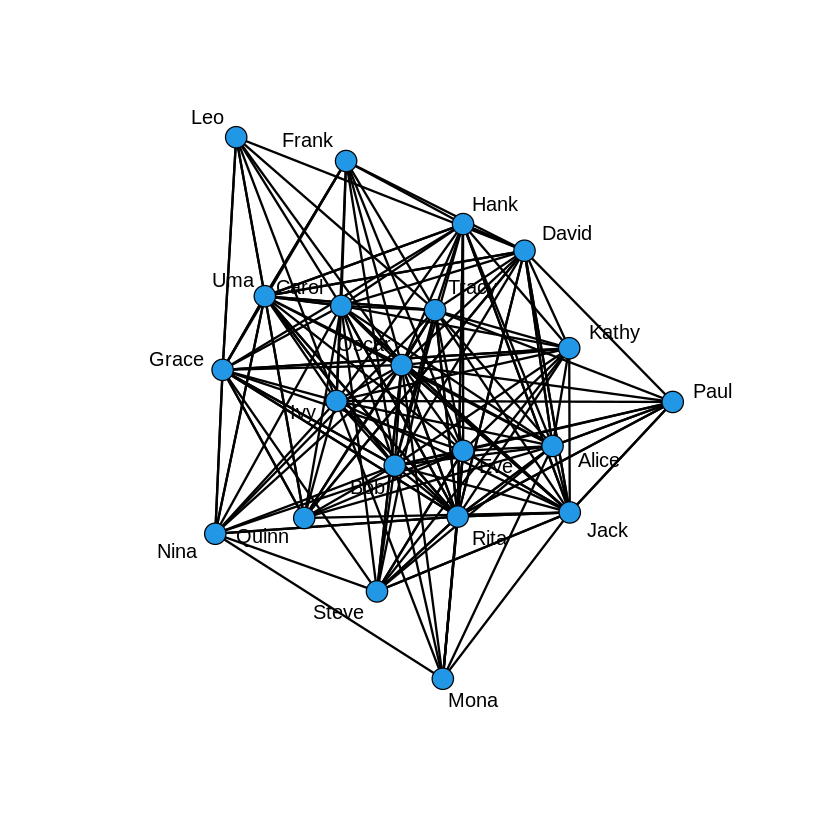

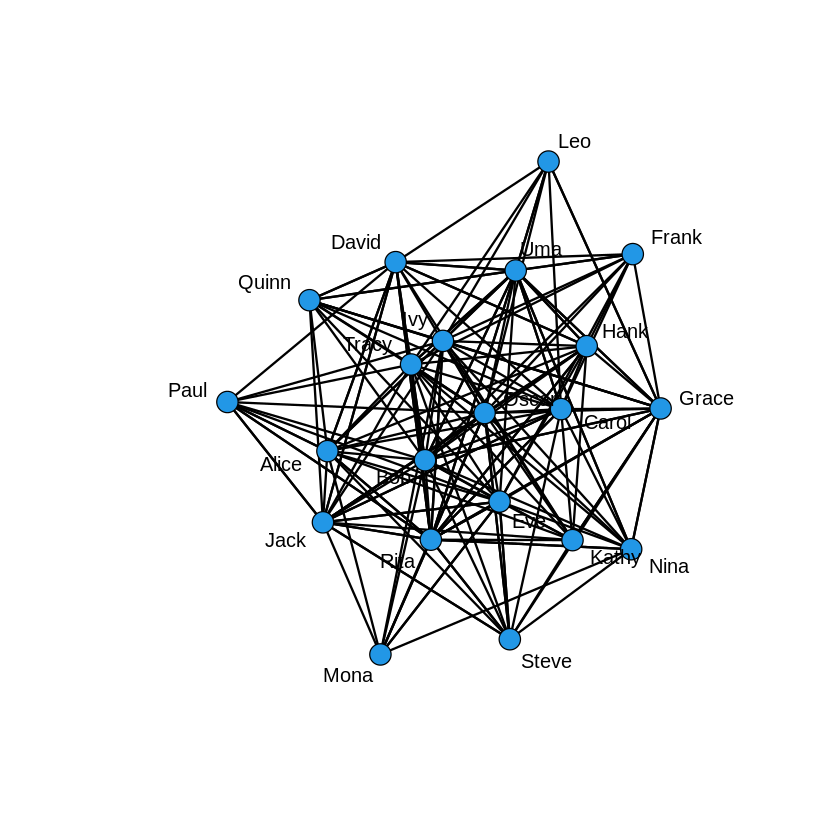

In [78]:
# Постоение направленной сети
# Объяснение параметров
# matrix.type = "adjacency" - тип входной матрицы
# directed = TRUE - направленная сеть
net2 <- network(sociomartix2, matrix.type = "adjacency", directed = TRUE)

# Отобразить сеть Фрюхтерман—Рейнгольд
gplot(net2, gmode = "graph", mode = "fruchtermanreingold", displaylabels = TRUE, vertex.col = 20)

# Отобразить сеть Камада—Каваи
gplot(net2,gmode = "graph",mode = "kamadakawai",displaylabels = TRUE,   vertex.col = 20)

#### Описательная сводка

In [79]:
summary(net2)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 190 
   missing edges = 0 
   non-missing edges = 190 
 density = 0.452381 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    3    1
  [2,]    4    1
  [3,]    5    1
  [4,]    9    1
  [5,]   10    1
  [6,]   11    1
  [7,]   13    1
  [8,]   15    1
  [9,]   16    1
 [10,]   17    1
 [11,]   18    1
 [12,]   19    1
 [13,]   20    1
 [14,]    1    2
 [15,]    3    2
 [16,]    4    2
 [17,]    5    2
 [18,]    7    2
 [19,]    8    2
 [20,]    9    2
 [21,]   10    2
 [22,]   11    2
 [23,]   13    2
 [24,]   14    2
 [25,]   15    2
 [26,]   16    2
 [27,]   17    2
 [28,]   18    2
 [29,]   19    2
 [30,]   20    2
 [31,]   21    2
 [32,]   10    3
 [33,]   15    3
 [34,]   18    3
 [35,]   19    3
 [36,]   21    3
 [37,]    1    4
 

#### Пятичесловая сводка

In [81]:
# Анализ сети с помощью igraph
size <- vcount(g2)  # количество вершин

components <- clusters(g2, mode = 'strong')
components_num <- components$no  # количество компонент

# Наибольшая компонента связности
largest_component <- induced_subgraph(g2, which(components$membership == which.max(components$csize)))
diam <- diameter(largest_component, directed = TRUE)

# Вывод результатов
cat("Размер: ", size, "\n")
cat("Плотность: ", round(edge_density(g2), 2), "\n")
cat("Диаметр: ", diam, "\n")
cat("Число компонент: ", components_num, "\n")
cat("Кластеризация: ", round(transitivity(g2, type = "global"), 2), "\n")

Размер:  21 
Плотность:  0.45 
Диаметр:  3 
Число компонент:  1 
Кластеризация:  0.73 


#### Меры престижа

In [89]:
# Расчет престижа для сети
n <- network.size(net2)

# Получаем имена вершин
names <- net2 %v% 'vertex.names'

# 1. Степенной престиж (нормализованная входящая степень)
degree_vals <- degree(net2, cmode = "indegree") / (n-1)

# 2. Престиж по близости для входящих связей
closeness_in <- igraph::closeness(g2, mode = "in", normalized = FALSE)

# Число вершин, из которых "видно" i (достижимых по входящим путям)
I_i <- colSums(igraph::distances(g2, mode = "in") > 0)

# Престиж по близости (нормализованный)
Pp_ni_norm <- round((I_i^2 / (n - 1)) * closeness_in, 2)

# 3. Престиж по Кацу
X <- as.matrix(as_adjacency_matrix(g2))
lambda_max <- max(Re(eigen(X)$values))
alpha <- 0.8 / lambda_max
I <- diag(nrow(X))
katz_prestige <- solve(I - alpha * t(X)) %*% rowSums(X)



# Создание таблицы
centrality_table <- data.frame(
  Семья = names,
  Степень = degree_vals,
  Близость = Pp_ni_norm,
  По_Кацу = round(katz_prestige, 3)
)

print(centrality_table)

    Семья Степень Близость По_Кацу
V1  Alice    0.65     0.67  74.509
V2    Bob    0.90     0.91 110.344
V3  Carol    0.25     0.56  49.020
V4  David    0.40     0.62  67.098
V5    Eve    0.25     0.50  41.710
V6  Frank    0.50     0.67  66.362
V7  Grace    0.65     0.74  88.288
V8   Hank    0.50     0.67  70.446
V9    Ivy    0.20     0.49  35.000
V10  Jack    0.45     0.57  62.238
V11 Kathy    0.55     0.67  66.785
V12   Leo    0.35     0.59  45.795
V13  Mona    0.20     0.49  30.379
V14  Nina    0.50     0.67  61.619
V15 Oscar    0.20     0.49  45.316
V16  Paul    0.40     0.57  51.441
V17 Quinn    0.45     0.65  58.871
V18  Rita    0.75     0.80 102.253
V19 Steve    0.20     0.49  35.379
V20 Tracy    0.40     0.61  61.318
V21   Uma    0.75     0.80 105.791


Высокая централизация власти:

Bob имеет значительно более высокие показатели, чем остальные

Разрыв между Bob (110.34) и следующими Rita/Uma (∼104) заметен

Несколько центров влияния:

Bob, Rita, Uma, Grace образуют ядро сети

Alice, Frank, Hank - важные связующие элементы

Периферийные акторы:

7 человек имеют низкие показатели по всем мерам

###  Выводы
Преобретены навыки работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей
